In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_weather_train = pd.read_csv("../ashrae-energy-prediction/weather_train.csv")
df_weather_train.info()

In [ ]:
def plot_gb(df : pd.DataFrame,group_by : str,x : str,y : str,fig_size : tuple[int,int] = (30,10)):
    ax = plt.figure(figsize=fig_size).gca()  # Create a single figure and axis

    for id, group in df.groupby(group_by):
        group.plot(x=x, y=y, ax=ax, label=f"{group_by} {id}")

    plt.title(f"{x} vs {y} for different {group_by}")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.legend()
    plt.show()

In [ ]:
# for y in df_weather_train.columns.difference(['timestamp','site_id']):
#     plot_gb(df=df_weather_train,x="timestamp",y=y,group_by="site_id")

In [ ]:
df_weather_train.groupby("site_id").plot(x="timestamp",y="air_temperature",subplots=True,figsize=(30,10))

In [ ]:
df_building = pd.read_csv("../ashrae-energy-prediction/building_metadata.csv")
df_building.info()

In [ ]:
# Create subplots with 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Filter data for site_id == 0
fil_col_building = df_building[df_building["site_id"] == 1]

# Pie chart for primary_use distribution
counts_primary_use = fil_col_building['primary_use'].value_counts()
ax[0,0].pie(counts_primary_use.values, labels=counts_primary_use.keys(), autopct='%1.1f%%')
ax[0,0].set_title("Primary Use Distribution")

# Histogram for square_feet distribution
ax[0,1].hist(fil_col_building['square_feet'], bins=15, color='skyblue', edgecolor='black')
ax[0,1].set_title("Square Feet Distribution")
ax[0,1].set_xlabel("Square Feet")
ax[0,1].set_ylabel("Frequency")

# Bar chart for year_built distribution
count_year = fil_col_building['year_built'].value_counts().sort_index()
ax[1,0].bar(count_year.index, count_year.values, color='orange')
ax[1,0].set_title("Year Built Distribution")
ax[1,0].set_xlabel("Year Built")
ax[1,0].set_ylabel("Count")
ax[1,0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

count_floor = fil_col_building['floor_count'].value_counts().sort_index()
ax[1,1].bar(count_floor.index, count_floor.values, color='orange')
ax[1,1].set_title("floor count distribution")
ax[1,1].set_xlabel("number of floors")
ax[1,1].set_ylabel("Count")
ax[1,1].tick_params(axis='x', rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

#### Plotting for a particular building for a day

C:\Users\micro\AppData\Local\Temp\ipykernel_20124\3508788630.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_building_meter['date'] = df_building_meter['timestamp'].dt.date


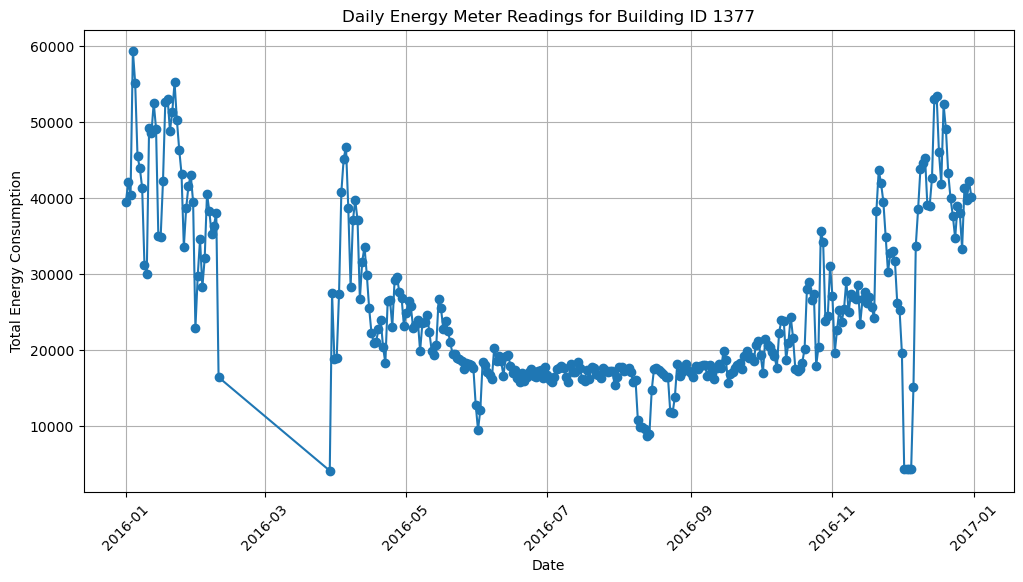

In [7]:
# Load data
df_building = pd.read_csv("../ashrae-energy-prediction/building_metadata.csv")
df_meter = pd.read_csv("../ashrae-energy-prediction/train.csv", parse_dates=['timestamp'])

# Merge datasets on building_id
df = df_meter.merge(df_building, on='building_id')

# Select a random building
random_building_id = np.random.choice(df['building_id'].unique())

# Filter data for the selected building
df_building_meter = df[df['building_id'] == random_building_id]

# Aggregate meter reading per day
df_building_meter['date'] = df_building_meter['timestamp'].dt.date
daily_meter_reading = df_building_meter.groupby('date')['meter_reading'].sum()

# Plot the energy usage over time
plt.figure(figsize=(12, 6))
plt.plot(daily_meter_reading.index, daily_meter_reading.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Energy Consumption")
plt.title(f"Daily Energy Meter Readings for Building ID {random_building_id}")
plt.xticks(rotation=45)
plt.grid()
plt.show()
